<a href="https://colab.research.google.com/github/CareerHeroes/ML-Stock-Price-Prediction-/blob/master/Stock_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Quandl


     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 61kB 29.0MB/s 
     |████████████████████████████████| 2.3MB 8.1MB/s 
     |████████████████████████████████| 102kB 39.7MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=21fd7c35c7eb55538aed1abbc1eb9bdea70b1072dce4f5a41a48a57e3dc04798
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import quandl
import pandas as pd
# import pandas_datareader.data as web
style.use('ggplot')
start_date = '2010-1-1'
end_date = '2019-1-31'
quandl.ApiConfig.api_key = 'gJbKvWPWeYcQz6zAqQB5'

In [0]:
import numpy as np
import seaborn as sns

In [0]:
# Download Microsoft stock data

stock_data=quandl.get('EOD/MSFT', start_date=start_date, end_date=end_date)

In [45]:
stock_data

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.0700,31.2900,31.880,154507000.0,0.00,1.0,27.539642,27.817207,27.140643,27.652403,154507000.0
2013-09-04,31.3900,31.4700,31.1100,31.195,142320600.0,0.00,1.0,27.227382,27.296773,26.984512,27.058240,142320600.0
2013-09-05,31.1000,31.4400,30.9500,31.235,71644900.0,0.00,1.0,26.975838,27.270751,26.845730,27.092936,71644900.0
2013-09-06,31.3100,31.3900,31.1300,31.152,75434900.0,0.00,1.0,27.157990,27.227382,27.001860,27.020943,75434900.0
2013-09-09,31.2208,31.7900,31.2000,31.655,49628500.0,0.00,1.0,27.080619,27.574338,27.062577,27.457240,49628500.0
2013-09-10,31.9000,32.4000,31.7900,32.390,56881200.0,0.00,1.0,27.669751,28.103446,27.574338,28.094772,56881200.0
2013-09-11,32.5700,32.9300,32.5300,32.740,39087500.0,0.00,1.0,28.250902,28.563163,28.216206,28.398358,39087500.0
2013-09-12,32.7200,32.7800,32.5900,32.690,32860200.0,0.00,1.0,28.381011,28.433054,28.268250,28.354989,32860200.0
2013-09-13,32.7700,33.0700,32.5050,33.030,40899000.0,0.00,1.0,28.424380,28.684597,28.194522,28.649902,40899000.0


In [46]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [47]:
stock_data = stock_data[['Open', 'Close', 'High', 'Low', 'Volume', 'Adj_Close']]
stock_data.head()

,Open,Close,High,Low,Volume,Adj_Close
Date,,,,,,
2013-09-03,31.7500,31.880,32.07,31.29,154507000.0,27.652403
2013-09-04,31.3900,31.195,31.47,31.11,142320600.0,27.058240
2013-09-05,31.1000,31.235,31.44,30.95,71644900.0,27.092936
2013-09-06,31.3100,31.152,31.39,31.13,75434900.0,27.020943
2013-09-09,31.2208,31.655,31.79,31.20,49628500.0,27.457240


In [48]:

stock_data.tail()

,Open,Close,High,Low,Volume,Adj_Close
Date,,,,,,
2017-12-21,86.05,85.50,86.1000,85.400,17990745.0,82.810200
2017-12-22,85.40,85.51,85.6300,84.920,14145841.0,82.819885
2017-12-26,85.31,85.40,85.5346,85.030,9891237.0,82.713346
2017-12-27,85.65,85.71,85.9800,85.215,14678025.0,83.013593
2017-12-28,85.90,85.72,85.9300,85.550,10594344.0,83.023279


In [49]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 6 columns):
Open         1090 non-null float64
Close        1090 non-null float64
High         1090 non-null float64
Low          1090 non-null float64
Volume       1090 non-null float64
Adj_Close    1090 non-null float64
dtypes: float64(6)
memory usage: 59.6 KB


In [50]:
stock_data.describe()

,Open,Close,High,Low,Volume,Adj_Close
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000
mean,52.584746,52.617352,52.995410,52.178964,3.185689e+07,48.688264
std,12.834439,12.832792,12.866606,12.784332,1.709372e+07,13.450539
min,31.100000,31.152000,31.390000,30.950000,7.425603e+06,27.020943
25%,42.955000,43.058750,43.265000,42.612500,2.185425e+07,38.700367
50%,49.535000,49.690000,50.105000,49.120000,2.808245e+07,46.039697
75%,60.640000,60.637500,61.130000,60.241250,3.624615e+07,57.413473
max,87.120000,86.850000,87.499900,86.230000,2.025224e+08,84.117729


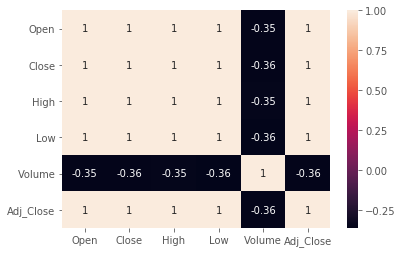

In [51]:

corr = stock_data.corr()
sns.heatmap(corr, annot=True)

In [52]:
df_test = stock_data[-20:]
print(df_test.shape)
df_test.head()

(20, 6)


,Open,Close,High,Low,Volume,Adj_Close
Date,,,,,,
2017-11-30,83.51,84.17,84.5200,83.3400,33054647.0,81.522041
2017-12-01,83.60,84.26,84.8100,83.2200,29532132.0,81.609210
2017-12-04,84.42,81.08,84.4299,80.7000,39094880.0,78.529251
2017-12-05,81.34,81.59,82.6800,80.9801,26152261.0,79.023207
2017-12-06,81.55,82.78,83.1400,81.4300,26162054.0,80.175770


In [53]:
df_train = stock_data[:-20]
print(df_train.shape)

(1070, 6)


# Plotting the data

In [0]:
def plot_train_val(train_data, val_data):
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(111)
    ax.plot(train_data, label='Train')
    ax.plot(val_data, label='Valid')
    ax.legend()
    plt.show()

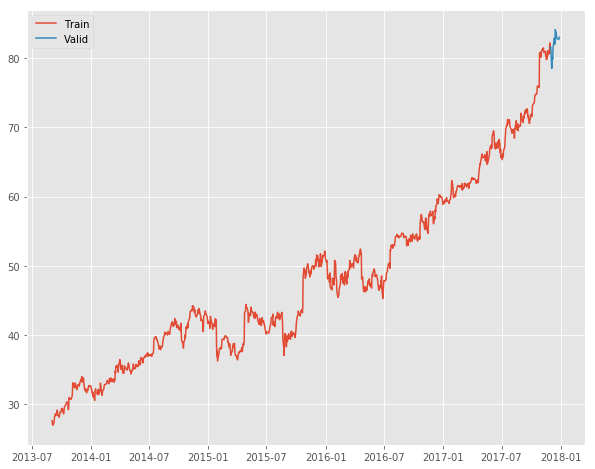

In [55]:
plot_train_val(df_train['Adj_Close'], df_test['Adj_Close'])

# Engineering Features

In [0]:
window = 7                       # We will use the last 6 day data to make prediction

train_data = df_train['Adj_Close']
test_data = df_test['Adj_Close']

index = len(train_data) - window

In [57]:
index

1063

In [0]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]

In [59]:
data

,0,1,2,3,4,5,6
0,27.652403,27.058240,27.092936,27.020943,27.457240,28.094772,28.398358
1,27.058240,27.092936,27.020943,27.457240,28.094772,28.398358,28.354989
2,27.092936,27.020943,27.457240,28.094772,28.398358,28.354989,28.649902
3,27.020943,27.457240,28.094772,28.398358,28.354989,28.649902,28.451269
4,27.457240,28.094772,28.398358,28.354989,28.649902,28.451269,28.563163
5,28.094772,28.398358,28.354989,28.649902,28.451269,28.563163,28.901445
6,28.398358,28.354989,28.649902,28.451269,28.563163,28.901445,29.179010
7,28.354989,28.649902,28.451269,28.563163,28.901445,29.179010,28.442595
8,28.649902,28.451269,28.563163,28.901445,29.179010,28.442595,28.398358
9,28.451269,28.563163,28.901445,29.179010,28.442595,28.398358,28.151152


In [60]:
y_train = data.iloc[:,-1]
y_train.shape

(1063,)

In [61]:
X_train = data.iloc[:,:-1]
X_train.shape

(1063, 6)

Repeating for test data

In [0]:
index = len(test_data) - window

In [0]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]

In [64]:
y_test = data.iloc[:,-1]
y_test.shape

(13,)

In [65]:
X_test = data.iloc[:,:-1]
X_test.shape

(13, 6)

# Model Building (Linear Regression, XGBoost, Ridge Regression)

1st: Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lr)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.3035744599165294


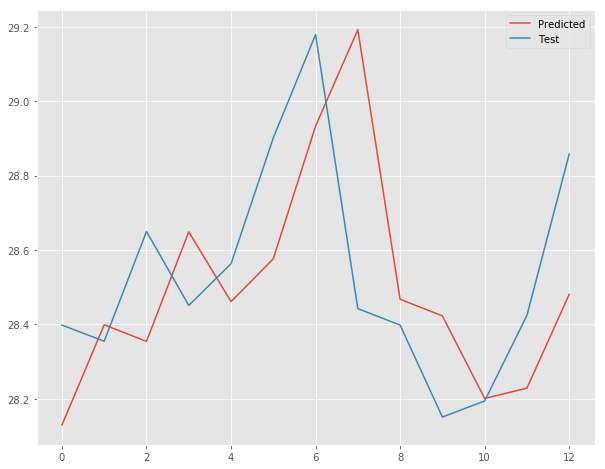

In [68]:

fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lr, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

2nd: XGBoost

In [0]:
import xgboost as xgb

In [70]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
y_pred_xgb = xgb_model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred_xgb)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.07738618045361755


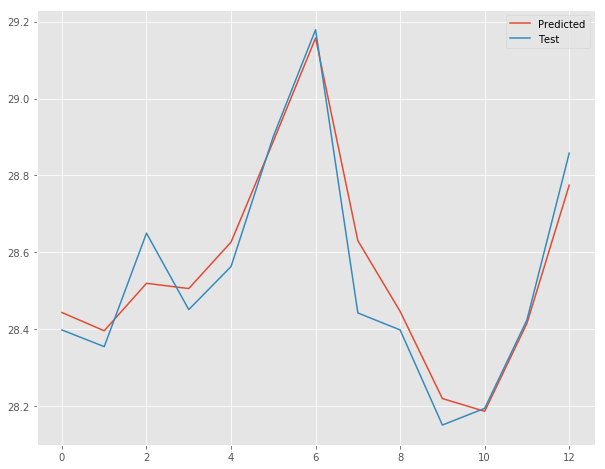

In [73]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_xgb, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

3rd: Ridge Regression

In [0]:

from sklearn.linear_model import Ridge

In [0]:

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred_ridge)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.3036638953835324


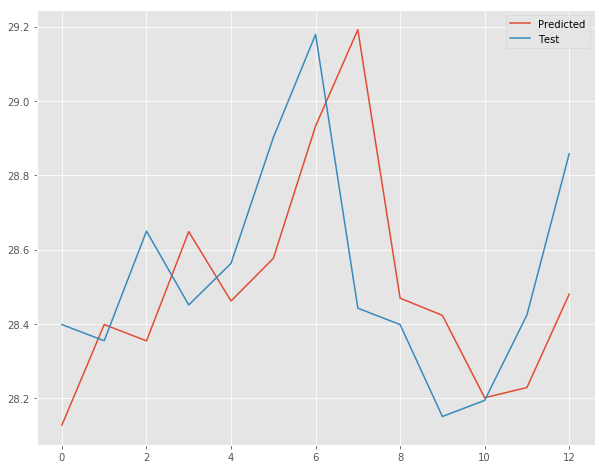

In [77]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_ridge, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()